In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 모든 경고 메시지 무시
warnings.filterwarnings("ignore")

In [2]:
dev = pd.read_csv("../data/raw/dev.csv", encoding="UTF-8")
test = pd.read_csv("../data/raw/test.csv", encoding="UTF-8")

In [3]:
def plot_label_count(df, df_name):
    grouped_data = df.groupby("label")["id"].count()
    grouped_data.plot(kind="bar", color="skyblue")
    plt.title(f"{df_name} label Count")
    plt.xlabel("label")
    plt.ylabel("Count")
    plt.show()

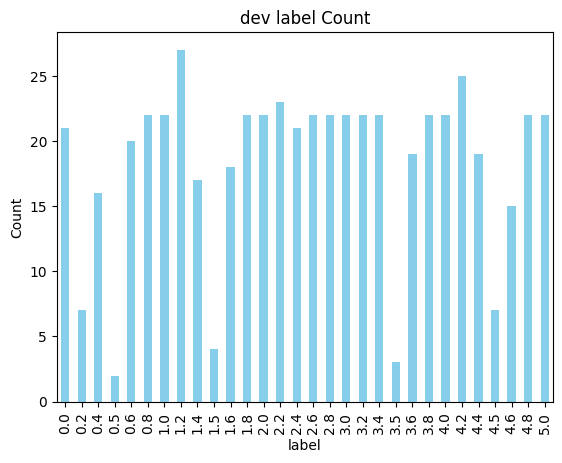

In [5]:
plot_label_count(dev,"dev")

In [6]:
def special_value_interpolation(df):
    # 0.5, 1.5, 2.5, 3.5, 4.5에 해당하는 값을 필터링
    target_values = [0.5, 1.5, 2.5, 3.5, 4.5]
    filtered_df = df[df["label"].isin(target_values)]

    # 각 값에 대해 절반은 +0.1, 절반은 -0.1
    def adjust_labels(group):
        n = len(group)
        # 절반으로 나눔
        half_n = n // 2
        # 첫 절반은 -0.1, 나머지는 +0.1
        group.iloc[:half_n] -= 0.1
        group.iloc[half_n:] += 0.1
        return group

    # 필터링된 값들에 대한 보정
    df.loc[df["label"].isin(target_values), "label"] = filtered_df.groupby("label")[
        "label"
    ].transform(adjust_labels)
    return df

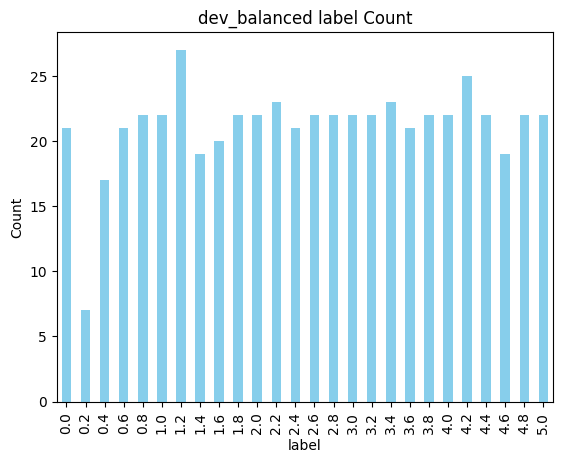

In [7]:
dev_balanced = special_value_interpolation(dev)
plot_label_count(dev_balanced, "dev_balanced")

In [8]:
dev_balanced.to_csv("../data/dev_balanced.csv")

In [9]:
def swap(df):
    """sentence 1과 2를 교환한 데이터 추가"""
    df_swaped = df.rename(
        columns={"sentence_1": "sentence_2", "sentence_2": "sentence_1"}
    )
    return pd.concat([df, df_swaped])

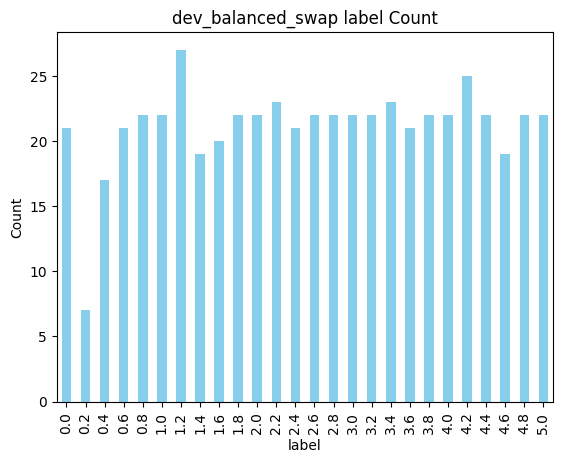

In [10]:
dev_balanced_swap = special_value_interpolation(dev_balanced)
plot_label_count(dev_balanced_swap, "dev_balanced_swap")

In [11]:
dev_balanced.to_csv("../data/dev_swap.csv")

In [ ]:
import pandas as pd

# 예시 데이터프레임 생성 (실제 데이터셋을 여기에 로드)
data = {"label": [0.1, 0.5, 1.1, 1.9, 2.3, 2.7, 3.5, 3.9, 4.2, 4.8] * 100}
df = pd.DataFrame(data)

# 구간을 설정 (0~1, 1~2, 2~3, 3~4, 4~5) 및 샘플 수 (550개의 데이터를 동일하게 나누면 구간당 110개씩)
bins = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
sample_size_per_bin = 110  # 각 구간당 추출할 개수

# 각 구간에서 동일한 개수로 샘플링
sampled_df_list = []
for lower, upper in bins:
    # 각 구간에 해당하는 데이터 추출
    bin_df = df[(df["label"] >= lower) & (df["label"] < upper)]

    # 구간에서 샘플링할 수 있는 데이터가 충분하지 않으면 오류 방지
    if len(bin_df) < sample_size_per_bin:
        print(f"구간 {lower}-{upper}에서 샘플링할 데이터가 부족합니다.")
        continue

    # 각 구간에서 지정된 개수만큼 무작위로 샘플링 (random_state=42로 고정 시드 사용)
    sampled_bin_df = bin_df.sample(
        n=sample_size_per_bin, random_state=42, replace=False
    )
    sampled_df_list.append(sampled_bin_df)

# 모든 구간에서 샘플링한 데이터를 하나의 DataFrame으로 합침
final_sampled_df = pd.concat(sampled_df_list).reset_index(drop=True)

# 각 구간에서 랜덤으로 겹치지 않게 10개씩 추출
small_sample_size = 10
final_random_samples = final_sampled_df.groupby(
    pd.cut(final_sampled_df["label"], bins=[0, 1, 2, 3, 4, 5])
).apply(lambda x: x.sample(n=small_sample_size, random_state=42))

# 결과 확인
print(f"최종 추출된 데이터 (550개): \n{final_sampled_df}")
print(f"각 구간에서 랜덤으로 추출된 10개의 데이터: \n{final_random_samples}")